#1. detecting white box

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [0]:
import random
def im_generator(batch_size=64):
  while True:
    for i in range(50):
      x=np.zeros((batch_size,100,100,3))
      y=np.zeros((batch_size,4))
      for j in range(batch_size):
        row0=np.random.randint(90)
        col0=np.random.randint(90)
        row1=np.random.randint(row0,100)
        col1=np.random.randint(col0,100)

        x[j,row0:row1,col0:col1,:]=1
        y[j,0]=row0/100
        y[j,1]=col0/100
        y[j,2]=(row1-row0)/100
        y[j,3]=(col1-col0)/100

      yield x,y

In [0]:
from keras.applications import vgg16
IMG_SHAPE=[100,100,3]
vgg16=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')



Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
p1=Flatten()(vgg16.output)
p1=Dense(4,activation='sigmoid')(p1)

model=Model(vgg16.input,p1)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

model.fit_generator(im_generator(64),steps_per_epoch=50,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
50/50 [==============================] - 5s 103ms/step - loss: 0.6954
Epoch 2/5
50/50 [==============================] - 5s 103ms/step - loss: 0.5511
Epoch 3/5
50/50 [==============================] - 5s 104ms/step - loss: 0.5122
Epoch 4/5
50/50 [==============================] - 5s 103ms/step - loss: 0.5078
Epoch 5/5
50/50 [==============================] - 5s 103ms/step - loss: 0.5068


In [0]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction():
  # Generate a random image
  x = np.zeros((100, 100, 3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)
  x[row0:row1,col0:col1,:] = 1
  print(row0, col0, row1, col1)
  
  # Predict
  X = np.expand_dims(x, 0)
  p = model.predict(X)[0]
  
  # Draw the box
  fig,ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
      (p[1]*100, p[0]*100),
      p[3]*100, p[2]*100,linewidth=1,edgecolor='red',facecolor='none')
  ax.add_patch(rect)
  plt.show()

82 74 97 83


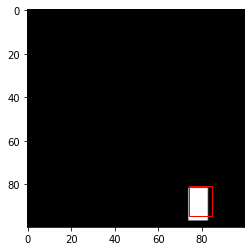

In [0]:
make_prediction()

#2. Adding charmander

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.applications import vgg16


In [0]:
def make_vgg(box_size):
  IMG_SHAPE=[box_size,box_size,3]
  vgg16=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
  
  p1=Flatten()(vgg16.output)
  p1=Dense(4,activation='sigmoid')(p1)
  model=Model(vgg16.input,p1)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))
  return model


In [8]:
!wget https://lazyprogrammer.me/course_files/charmander-tight.png

--2020-04-08 15:42:43--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952 (3.9K) [image/png]
Saving to: ‘charmander-tight.png.1’

charmander-tight.pn 100%[===================>]   3.86K  --.-KB/s    in 0s      

2020-04-08 15:42:43 (81.0 MB/s) - ‘charmander-tight.png.1’ saved [3952/3952]



(56, 44, 4)

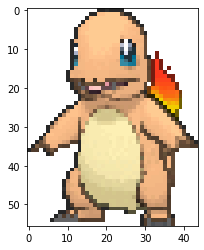

In [9]:
import matplotlib.pyplot as plt
from imageio import imread
chim = imread('charmander-tight.png.1')
plt.imshow(chim) 
chim.shape
#chim=np.array(chim)

In [0]:
import random
box_size=200
chim=np.array(chim)
ch_h=chim.shape[0]
ch_w=chim.shape[1]

def chim_generator(batch_size=64):
  while True:
    for i in range(50):
      x=np.zeros((batch_size,box_size,box_size,3))
      y=np.zeros((batch_size,4))
      for j in range(batch_size):
        row0=np.random.randint(box_size-ch_h)
        col0=np.random.randint(box_size-ch_w)
        row1=row0+ch_h
        col1=col0+ch_w

        x[j,row0:row1,col0:col1,:]=chim[:,:,:3]
        y[j,0]=row0/box_size
        y[j,1]=col0/box_size
        y[j,2]=(row1-row0)/box_size
        y[j,3]=(col1-col0)/box_size

      yield x/255.,y

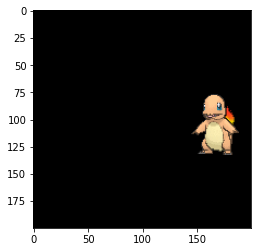

In [11]:
x=np.zeros((box_size,box_size,3))
row0=np.random.randint(box_size-ch_h)
col0=np.random.randint(box_size-ch_w)
row1=row0+ch_h
col1=col0+ch_w
x[row0:row1,col0:col1,:]=chim[:,:,:3]
plt.imshow((x).astype(np.uint8))
x = np.expand_dims(x, 0)

In [12]:
mod = make_vgg(200)
mod.fit_generator(chim_generator(64),steps_per_epoch=50,epochs=5)

58892288/58889256 [==============================] - 1s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
50/50 [==============================] - 32s 649ms/step - loss: 0.7089
Epoch 2/5
50/50 [==============================] - 33s 660ms/step - loss: 0.5561
Epoch 3/5
50/50 [==============================] - 33s 666ms/step - loss: 0.5537
Epoch 4/5
50/50 [==============================] - 33s 661ms/step - loss: 0.5532
Epoch 5/5
50/50 [==============================] - 33s 662ms/step - loss: 0.5544


In [0]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction2():
  # Generate a random image
  x = np.zeros((box_size, box_size, 3))
  row0=np.random.randint(box_size-ch_h)
  col0=np.random.randint(box_size-ch_w)
  row1=row0+ch_h
  col1=col0+ch_w
  x[row0:row1,col0:col1,:] = chim[:,:,:3]
  print(row0, col0, row1, col1)
  
  # Predict
  X = np.expand_dims(x, 0)/255.
  plt.imshow(x.astype(np.uint8))
  p = mod.predict(X)[0]
  
  # Draw the box
  fig,ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle(
      (p[1]*box_size, p[0]*box_size),
      p[3]*box_size, p[2]*box_size,linewidth=1,edgecolor='red',facecolor='none')
  ax.add_patch(rect)
  plt.show()

31 53 87 97


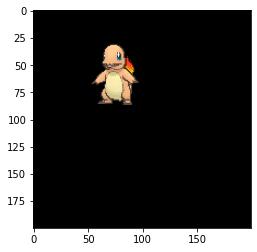

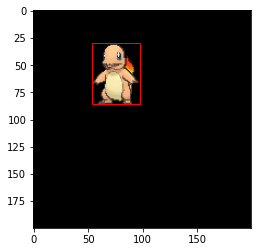

In [14]:
make_prediction2()

#3.Changing the size of charmander


In [0]:
from skimage.transform import resize
box_size=200
chim=np.array(chim)
ch_h=chim.shape[0]
ch_w=chim.shape[1]

def chim_generator2(batch_size=64):
  while True:
    for i in range(50):
      x=np.zeros((batch_size,box_size,box_size,3))
      y=np.zeros((batch_size,4))
      for j in range(batch_size):
        scale = 0.5 + np.random.random()
        newh=int(ch_h*scale)
        neww=int(ch_w*scale)
        obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
        row0=np.random.randint(box_size-newh)
        col0=np.random.randint(box_size-neww)
        row1=row0+newh
        col1=col0+neww

        x[j,row0:row1,col0:col1,:]=obj[:,:,:3]
        y[j,0]=row0/box_size
        y[j,1]=col0/box_size
        y[j,2]=(row1-row0)/box_size
        y[j,3]=(col1-col0)/box_size

      yield x/255.,y

In [0]:
def make_vgg(box_size):
  IMG_SHAPE=[box_size,box_size,3]
  vgg16=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
  
  p1=Flatten()(vgg16.output)
  p1=Dense(4,activation='sigmoid')(p1)
  model=Model(vgg16.input,p1)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))
  return model


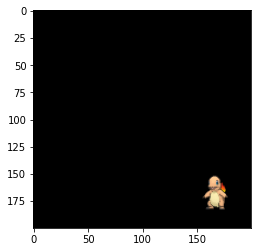

In [132]:
scale = 0.5 + random.random()
newh=int(ch_h*scale)
neww=int(ch_w*scale)
x=np.zeros((box_size,box_size,3))
obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
row0=np.random.randint(box_size-newh)
col0=np.random.randint(box_size-neww)
row1=row0+newh
col1=col0+neww
x[row0:row1,col0:col1,:]=obj[:,:,:3]
plt.imshow((x).astype(np.uint8))
x = np.expand_dims(x, 0)

In [136]:
mod = make_vgg(200)
mod.fit_generator(chim_generator2(64),steps_per_epoch=50,epochs=5)

Epoch 1/5
50/50 [==============================] - 33s 668ms/step - loss: 0.7304
Epoch 2/5
50/50 [==============================] - 33s 665ms/step - loss: 0.5530
Epoch 3/5
50/50 [==============================] - 33s 663ms/step - loss: 0.5454
Epoch 4/5
50/50 [==============================] - 33s 666ms/step - loss: 0.5449
Epoch 5/5
50/50 [==============================] - 33s 665ms/step - loss: 0.5436


In [0]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction3():
  # Generate a random image
  scale = 0.5 + random.random()
  newh=int(ch_h*scale)
  neww=int(ch_w*scale)
  obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
  row0=np.random.randint(box_size-newh)
  col0=np.random.randint(box_size-neww)
  row1=row0+newh
  col1=col0+neww
  x=np.zeros((box_size,box_size,3))
  x[row0:row1,col0:col1,:]=obj[:,:,:3]
  plt.imshow((x).astype(np.uint8))
  X = np.expand_dims(x, 0)/255.
  print(row0, col0, row1, col1)
  
  # Predict
  plt.imshow(x.astype(np.uint8))
  p = mod.predict(X)[0]
  
  # Draw the box
  row0 = int(p[0]*200)
  col0 = int(p[1]*200)
  row1 = int(row0 + p[2]*200)
  col1 = int(col0 + p[3]*200)
  print("pred:", row0, col0, row1, col1)
  
  fig,ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  print(p[3]*box_size,p[2]*box_size)
  rect = Rectangle(
      (p[1]*box_size, p[0]*box_size),
      p[3]*box_size, p[2]*box_size,linewidth=1,edgecolor='red',facecolor='none')
  ax.add_patch(rect)
  plt.show()

55 99 91 127
pred: 54 95 92 123
28.964948654174805 38.08700740337372


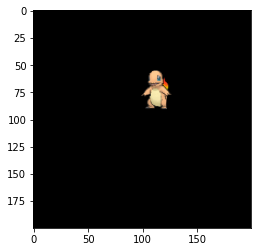

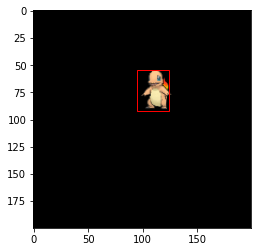

In [140]:
make_prediction3()


#4. Flipping charmander

In [0]:
from skimage.transform import resize
box_size=200
chim=np.array(chim)
ch_h=chim.shape[0]
ch_w=chim.shape[1]

def chim_generator3(batch_size=64):
  while True:
    for i in range(50):
      x=np.zeros((batch_size,box_size,box_size,3))
      y=np.zeros((batch_size,4))
      for j in range(batch_size):
        scale = 0.5 + np.random.random()
        newh=int(ch_h*scale)
        neww=int(ch_w*scale)
        obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
        row0=np.random.randint(box_size-newh)
        col0=np.random.randint(box_size-neww)
        row1=row0+newh
        col1=col0+neww

        if np.random.random() < 0.5:
          obj = np.fliplr(obj)
        else:
          pass

        x[j,row0:row1,col0:col1,:]=obj[:,:,:3]
        y[j,0]=row0/box_size
        y[j,1]=col0/box_size
        y[j,2]=(row1-row0)/box_size
        y[j,3]=(col1-col0)/box_size

      yield x/255.,y

In [0]:
def make_vgg(box_size):
  IMG_SHAPE=[box_size,box_size,3]
  vgg16=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
  
  p1=Flatten()(vgg16.output)
  p1=Dense(4,activation='sigmoid')(p1)
  model=Model(vgg16.input,p1)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))
  return model

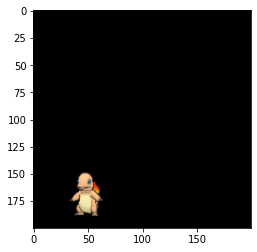

In [148]:
scale = 0.5 + random.random()
newh=int(ch_h*scale)
neww=int(ch_w*scale)
x=np.zeros((box_size,box_size,3))
obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
row0=np.random.randint(box_size-newh)
col0=np.random.randint(box_size-neww)
row1=row0+newh
col1=col0+neww
if np.random.random() < 0.5:
  obj = np.fliplr(obj)
else:
  pass
x[row0:row1,col0:col1,:]=obj[:,:,:3]
plt.imshow((x).astype(np.uint8))
x = np.expand_dims(x, 0)

In [149]:
mod = make_vgg(200)
mod.fit_generator(chim_generator3(64),steps_per_epoch=50,epochs=5)

Epoch 1/5
50/50 [==============================] - 33s 669ms/step - loss: 0.6318
Epoch 2/5
50/50 [==============================] - 33s 667ms/step - loss: 0.5516
Epoch 3/5
50/50 [==============================] - 33s 664ms/step - loss: 0.5470
Epoch 4/5
50/50 [==============================] - 33s 665ms/step - loss: 0.5447
Epoch 5/5
50/50 [==============================] - 33s 667ms/step - loss: 0.5464


In [0]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction4():
  # Generate a random image
  scale = 0.5 + random.random()
  newh=int(ch_h*scale)
  neww=int(ch_w*scale)
  obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
  row0=np.random.randint(box_size-newh)
  col0=np.random.randint(box_size-neww)
  row1=row0+newh
  col1=col0+neww
  x=np.zeros((box_size,box_size,3))
  if np.random.random() < 0.5:
    obj = np.fliplr(obj)
  else:
    pass
  x[row0:row1,col0:col1,:]=obj[:,:,:3]
  plt.imshow((x).astype(np.uint8))
  X = np.expand_dims(x, 0)/255.
  print(row0, col0, row1, col1)
  
  # Predict
  plt.imshow(x.astype(np.uint8))
  p = mod.predict(X)[0]
  
  # Draw the box
  row0 = int(p[0]*200)
  col0 = int(p[1]*200)
  row1 = int(row0 + p[2]*200)
  col1 = int(col0 + p[3]*200)
  print("pred:", row0, col0, row1, col1)
  
  fig,ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  print(p[3]*box_size,p[2]*box_size)
  rect = Rectangle(
      (p[1]*box_size, p[0]*box_size),
      p[3]*box_size, p[2]*box_size,linewidth=1,edgecolor='red',facecolor='none')
  ax.add_patch(rect)
  plt.show()

2 37 70 90
pred: 2 36 71 90
54.08026576042175 69.204843044281


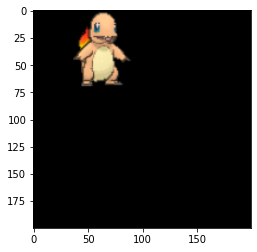

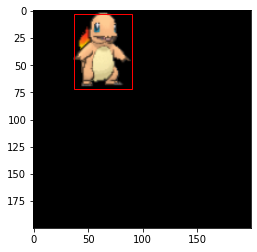

In [154]:
make_prediction4()

#5. Adding background

In [74]:
!wget  https://lazyprogrammer.me/course_files/backgrounds.zip

--2020-04-09 08:34:38--  https://lazyprogrammer.me/course_files/backgrounds.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494000 (482K) [application/zip]
Saving to: ‘backgrounds.zip.2’

backgrounds.zip.2   100%[===================>] 482.42K   586KB/s    in 0.8s    

2020-04-09 08:34:40 (586 KB/s) - ‘backgrounds.zip.2’ saved [494000/494000]



In [75]:
!wget https://lazyprogrammer.me/course_files/charmander-tight.png

--2020-04-09 08:34:44--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952 (3.9K) [image/png]
Saving to: ‘charmander-tight.png.2’

charmander-tight.pn 100%[===================>]   3.86K  --.-KB/s    in 0s      

2020-04-09 08:34:44 (66.6 MB/s) - ‘charmander-tight.png.2’ saved [3952/3952]



(56, 44, 4)

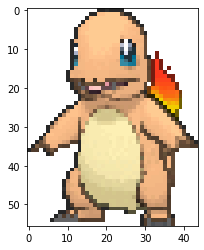

In [76]:
import matplotlib.pyplot as plt
from imageio import imread
chim = imread('charmander-tight.png')
plt.imshow(chim) 
chim.shape

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.applications import vgg16

In [78]:
!unzip -n backgrounds.zip

Archive:  backgrounds.zip


In [79]:
import glob

backs=glob.glob("/content/backgrounds/*.jpg")
print(len(backs))

15


(200, 200, 3)
(78, 61)
(200, 200, 3)


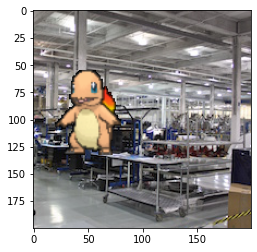

In [98]:
from skimage.transform import resize

#background
box_size=200
x=np.zeros((box_size,box_size,3))
bnum=np.random.randint(1,16)
bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
plt.imshow(bim)
bim=np.array(bim)
b_h=bim.shape[0]
b_w=bim.shape[1]
b_row0=np.random.randint(b_h-200)
b_col0=np.random.randint(b_w-200)
b_row1=b_row0+200
b_col1=b_col0+200
bg=bim[b_row0:b_row1,b_col0:b_col1,:].copy()
print(bg.shape)
plt.imshow(bg)

#charmander settings 
ch_h=chim.shape[0]
ch_w=chim.shape[1]
scale = 0.5 + np.random.random()
newh=int(ch_h*scale)
neww=int(ch_w*scale)
x=np.zeros((box_size,box_size,3))
obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
row0=np.random.randint(box_size-newh)
col0=np.random.randint(box_size-neww)
row1=row0+newh
col1=col0+neww
if np.random.random() < 0.5:
  obj = np.fliplr(obj)
else:
  pass
x[row0:row1,col0:col1,:]=obj[:,:,:3]
# plt.imshow((x).astype(np.uint8))

#charmander mask
mask = (obj[:,:,3]==0)
print(mask.shape)
plt.imshow(mask)
mask=np.expand_dims(mask,-1)
#charring background

bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask
bg[row0:row1,col0:col1,:]+=obj[:,:,:3]
print(bg.shape)
plt.imshow(bg)


In [0]:
from skimage.transform import resize
box_size=200
chim=np.array(chim)
ch_h=chim.shape[0]
ch_w=chim.shape[1]

def chim_generator4(batch_size=64):
  while True:
    for i in range(50):
      x=np.zeros((batch_size,box_size,box_size,3))
      y=np.zeros((batch_size,4))
      for j in range(batch_size):
        
        bnum=np.random.randint(1,16)
        bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
        bim=np.array(bim)
        b_h=bim.shape[0]
        b_w=bim.shape[1]
        b_row0=np.random.randint(b_h-200)
        b_col0=np.random.randint(b_w-200)
        b_row1=b_row0+200
        b_col1=b_col0+200
        bg=bim[b_row0:b_row1,b_col0:b_col1,:].copy()
        
        scale = 0.5 + np.random.random()
        newh=int(ch_h*scale)
        neww=int(ch_w*scale)
        obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
        row0=np.random.randint(box_size-newh)
        col0=np.random.randint(box_size-neww)
        row1=row0+newh
        col1=col0+neww

        if np.random.random() < 0.5:
          obj = np.fliplr(obj)
        
        mask = (obj[:,:,3]==0)
        mask=np.expand_dims(mask,-1)

        bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask
        bg[row0:row1,col0:col1,:]+=obj[:,:,:3]

        x[j]=bg
        y[j,0]=row0/box_size
        y[j,1]=col0/box_size
        y[j,2]=(row1-row0)/box_size
        y[j,3]=(col1-col0)/box_size

      yield x/255.,y

In [0]:
def make_vgg(box_size=200):
  IMG_SHAPE=[box_size,box_size,3]
  vgg16=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
  
  p1=Flatten()(vgg16.output)
  p1=Dense(4,activation='sigmoid')(p1)
  model=Model(vgg16.input,p1)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001))
  return model

In [160]:
mod = make_vgg(200)
mod.fit_generator(chim_generator4(64),steps_per_epoch=50,epochs=5)

Epoch 1/5
50/50 [==============================] - 34s 679ms/step - loss: 0.5626
Epoch 2/5
50/50 [==============================] - 34s 684ms/step - loss: 0.5436
Epoch 3/5
50/50 [==============================] - 35s 690ms/step - loss: 0.5427
Epoch 4/5
50/50 [==============================] - 35s 700ms/step - loss: 0.5447
Epoch 5/5
50/50 [==============================] - 35s 702ms/step - loss: 0.5426


In [0]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction5():
  bnum=np.random.randint(1,16)
  bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
  bim=np.array(bim)
  b_h=bim.shape[0]
  b_w=bim.shape[1]
  b_row0=np.random.randint(b_h-200)
  b_col0=np.random.randint(b_w-200)
  b_row1=b_row0+200
  b_col1=b_col0+200
  bg=bim[b_row0:b_row1,b_col0:b_col1,:].copy()
        
  scale = 0.5 + np.random.random()
  newh=int(ch_h*scale)
  neww=int(ch_w*scale)
  obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
  row0=np.random.randint(box_size-newh)
  col0=np.random.randint(box_size-neww)
  row1=row0+newh
  col1=col0+neww

  if np.random.random() < 0.5:
    obj = np.fliplr(obj)
        
  mask = (obj[:,:,3]==0)
  mask=np.expand_dims(mask,-1)

  bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask
  bg[row0:row1,col0:col1,:]+=obj[:,:,:3]


  X = np.expand_dims(bg, 0)/255.

  #plt.imshow(bg.astype(np.uint8))
  p=mod.predict(X)[0]
  
  # Draw the box
  row0 = int(p[0]*200)
  col0 = int(p[1]*200)
  row1 = int(row0 + p[2]*200)
  col1 = int(col0 + p[3]*200)
  print("pred:", row0, col0, row1, col1)
  fig,ax = plt.subplots(1)
  ax.imshow(bg.astype(np.uint8))
  print("box size",p[3]*box_size,p[2]*box_size)
  rect = Rectangle(
      (p[1]*box_size, p[0]*box_size),
      p[3]*box_size, p[2]*box_size,linewidth=1,edgecolor='red',facecolor='none')
  ax.add_patch(rect)
  plt.show()

pred: 9 55 79 106
box size 51.500362157821655 70.32387852668762


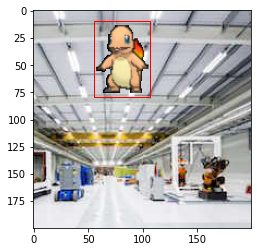

In [154]:
make_prediction5()


#6. Pictures with no charmander

In [5]:
!wget  https://lazyprogrammer.me/course_files/backgrounds.zip

--2020-04-09 11:01:05--  https://lazyprogrammer.me/course_files/backgrounds.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494000 (482K) [application/zip]
Saving to: ‘backgrounds.zip’

backgrounds.zip     100%[===================>] 482.42K   401KB/s    in 1.2s    

2020-04-09 11:01:07 (401 KB/s) - ‘backgrounds.zip’ saved [494000/494000]



In [6]:
!wget https://lazyprogrammer.me/course_files/charmander-tight.png

--2020-04-09 11:01:09--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952 (3.9K) [image/png]
Saving to: ‘charmander-tight.png’

charmander-tight.pn 100%[===================>]   3.86K  --.-KB/s    in 0s      

2020-04-09 11:01:09 (53.3 MB/s) - ‘charmander-tight.png’ saved [3952/3952]



(56, 44, 4)

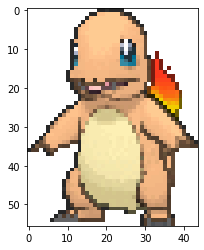

In [7]:
import matplotlib.pyplot as plt
from imageio import imread
chim = imread('charmander-tight.png')
plt.imshow(chim) 
chim.shape

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.applications import vgg16
from tensorflow.keras.losses import binary_crossentropy
from imageio import imread


In [9]:
!unzip -n backgrounds.zip

Archive:  backgrounds.zip
   creating: backgrounds/
  inflating: backgrounds/8.jpg       
   creating: __MACOSX/
   creating: __MACOSX/backgrounds/
  inflating: __MACOSX/backgrounds/._8.jpg  
  inflating: backgrounds/9.jpg       
  inflating: __MACOSX/backgrounds/._9.jpg  
  inflating: backgrounds/14.jpg      
  inflating: __MACOSX/backgrounds/._14.jpg  
  inflating: backgrounds/15.jpg      
  inflating: __MACOSX/backgrounds/._15.jpg  
  inflating: backgrounds/12.jpg      
  inflating: __MACOSX/backgrounds/._12.jpg  
  inflating: backgrounds/13.jpg      
  inflating: __MACOSX/backgrounds/._13.jpg  
  inflating: backgrounds/11.jpg      
  inflating: __MACOSX/backgrounds/._11.jpg  
  inflating: backgrounds/10.jpg      
  inflating: __MACOSX/backgrounds/._10.jpg  
  inflating: backgrounds/4.jpg       
  inflating: __MACOSX/backgrounds/._4.jpg  
  inflating: backgrounds/5.jpg       
  inflating: __MACOSX/backgrounds/._5.jpg  
  inflating: backgrounds/7.jpg       
  inflating: __MACOSX/back

In [10]:
import glob

backs=glob.glob("/content/backgrounds/*.jpg")
print(len(backs))

15


In [0]:
def poke_loss(y_true,y_pred):
  l1=binary_crossentropy(y_true[:,:-1],y_pred[:,:-1])
  l2=binary_crossentropy(y_true[:,-1],y_pred[:,-1])
  l=2*l1*y_true[:,-1]+0.5*l2
  return l

(200, 200, 3)
(200, 200, 3)


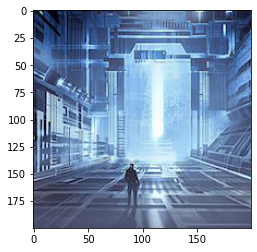

In [50]:
from skimage.transform import resize

#background
box_size=200
x=np.zeros((box_size,box_size,3))
bnum=np.random.randint(1,16)
bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
plt.imshow(bim)
bim=np.array(bim)
b_h=bim.shape[0]
b_w=bim.shape[1]
b_row0=np.random.randint(b_h-200)
b_col0=np.random.randint(b_w-200)
b_row1=b_row0+200
b_col1=b_col0+200
bg=bim[b_row0:b_row1,b_col0:b_col1,:].copy()
print(bg.shape)
plt.imshow(bg)

if np.random.randn()>0.5:
  #charmander settings 
  ch_h=chim.shape[0]
  ch_w=chim.shape[1]
  scale = 0.5 + np.random.random()
  newh=int(ch_h*scale)
  neww=int(ch_w*scale)
  x=np.zeros((box_size,box_size,3))
  obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
  row0=np.random.randint(box_size-newh)
  col0=np.random.randint(box_size-neww)
  row1=row0+newh
  col1=col0+neww
  if np.random.random() < 0.5:
    obj = np.fliplr(obj)
  else:
    pass
  x[row0:row1,col0:col1,:]=obj[:,:,:3]
  # plt.imshow((x).astype(np.uint8))

  #charmander mask
  mask = (obj[:,:,3]==0)
  print(mask.shape)
  plt.imshow(mask)
  mask=np.expand_dims(mask,-1)
  #charring background

  bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask
  bg[row0:row1,col0:col1,:]+=obj[:,:,:3]
print(bg.shape)
plt.imshow(bg)


In [0]:
from skimage.transform import resize
box_size=200
chim=np.array(chim)
ch_h=chim.shape[0]
ch_w=chim.shape[1]

def chim_generator5(batch_size=64):
  while True:
    for i in range(50):
      x=np.zeros((batch_size,box_size,box_size,3))
      y=np.zeros((batch_size,5))
      
      for j in range(batch_size):
        bnum=np.random.randint(1,16)
        bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
        bim=np.array(bim)
        b_h=bim.shape[0]
        b_w=bim.shape[1]
        b_row0=np.random.randint(b_h-200)
        b_col0=np.random.randint(b_w-200)
        b_row1=b_row0+200
        b_col1=b_col0+200
        bg=bim[b_row0:b_row1,b_col0:b_col1,:]
        v=0
        
        if np.random.random()<0.5:

          scale = 0.5 + np.random.random()
          newh=int(ch_h*scale)
          neww=int(ch_w*scale)
          obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
          row0=np.random.randint(box_size-newh)
          col0=np.random.randint(box_size-neww)
          row1=row0+newh
          col1=col0+neww

          if np.random.random() < 0.5:
            obj = np.fliplr(obj)
          
          mask = (obj[:,:,3]==0)
          mask=np.expand_dims(mask,-1)

          bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask
          bg[row0:row1,col0:col1,:]+=obj[:,:,:3]
          v=1

          y[j,0]=row0/box_size
          y[j,1]=col0/box_size
          y[j,2]=(row1-row0)/box_size
          y[j,3]=(col1-col0)/box_size

        x[j] = bg.copy()
        y[j,4]=v

      yield x/255.,y

In [0]:
def make_vgg(box_size=200):
  IMG_SHAPE=[box_size,box_size,3]
  vgg16=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
  
  p1=Flatten()(vgg16.output)
  p1=Dense(5,activation='sigmoid')(p1)
  model=Model(vgg16.input,p1)

  model.compile(loss=poke_loss, optimizer=Adam(lr=0.0001))
  return model

In [177]:
mod = make_vgg(200)
mod.fit_generator(chim_generator5(64),steps_per_epoch=50,epochs=5)

Epoch 1/5
50/50 [==============================] - 39s 774ms/step - loss: 0.6249
Epoch 2/5
50/50 [==============================] - 37s 736ms/step - loss: 0.5537
Epoch 3/5
50/50 [==============================] - 38s 753ms/step - loss: 0.5551
Epoch 4/5
50/50 [==============================] - 37s 748ms/step - loss: 0.5586
Epoch 5/5
50/50 [==============================] - 37s 749ms/step - loss: 0.5350


In [0]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction6():
  bnum=np.random.randint(1,16)
  bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
  bim=np.array(bim)
  b_h=bim.shape[0]
  b_w=bim.shape[1]
  b_row0=np.random.randint(b_h-200)
  b_col0=np.random.randint(b_w-200)
  b_row1=b_row0+200
  b_col1=b_col0+200
  bg=bim[b_row0:b_row1,b_col0:b_col1,:].copy()
  if np.random.random()>0.3:      
    scale = 0.5 + np.random.random()
    newh=int(ch_h*scale)
    neww=int(ch_w*scale)
    obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
    row0=np.random.randint(box_size-newh)
    col0=np.random.randint(box_size-neww)
    row1=row0+newh
    col1=col0+neww

    if np.random.random() < 0.5:
      obj = np.fliplr(obj)
          
    mask = (obj[:,:,3]==0)
    mask=np.expand_dims(mask,-1)

    bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask

    bg[row0:row1,col0:col1,:]+=obj[:,:,:3]


  X = np.expand_dims(bg, 0)/255.

  #plt.imshow(bg.astype(np.uint8))
  p=mod.predict(X)[0]
  
  # Draw the box
  if p[-1]<0.5:
    print("no obj")
    fig,ax = plt.subplots(1)
    ax.imshow(bg.astype(np.uint8))
  else:
    row0 = int(p[0]*200)
    col0 = int(p[1]*200)
    row1 = int(row0 + p[2]*200)
    col1 = int(col0 + p[3]*200)
    print("pred:", row0, col0, row1, col1)
    fig,ax = plt.subplots(1)
    ax.imshow(bg.astype(np.uint8))
    print("box size",p[3]*box_size,p[2]*box_size)
    rect = Rectangle(
        (p[1]*box_size, p[0]*box_size),
        p[3]*box_size, p[2]*box_size,linewidth=1,edgecolor='red',facecolor='none')
    ax.add_patch(rect)
  plt.show()

pred: 107 53 156 95
box size 42.68614649772644 49.610236287117004


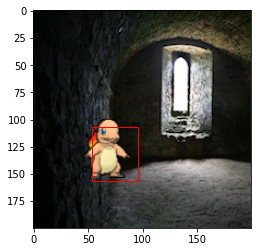

In [189]:
make_prediction6()

#7. Adding other pokemen

In [0]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from tensorflow.keras.layers import Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from skimage.transform import resize

In [279]:
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png
!wget -nc https://lazyprogrammer.me/course_files/bulbasaur-tight.png
!wget -nc https://lazyprogrammer.me/course_files/squirtle-tight.png

File ‘charmander-tight.png’ already there; not retrieving.

File ‘bulbasaur-tight.png’ already there; not retrieving.

File ‘squirtle-tight.png’ already there; not retrieving.



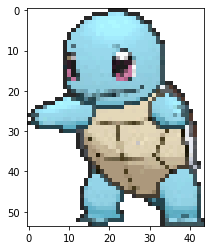

In [280]:
from imageio import imread
chim = imread('charmander-tight.png')
buim=imread('bulbasaur-tight.png')
sim=imread('squirtle-tight.png')
plt.imshow(sim) 

In [281]:
!unzip -n backgrounds.zip

Archive:  backgrounds.zip


In [0]:
def poke_loss2(y_true,y_pred):
  l1=binary_crossentropy(y_true[:,:4],y_pred[:,:4])
  l2=categorical_crossentropy(y_true[:,4:7],y_pred[:,4:7])
  l3=binary_crossentropy(y_true[:,-1],y_pred[:,-1])
  l=l1*y_true[:,-1]+l2*true[:,-1]+0.5*l3
  return l

In [0]:
from skimage.transform import resize
box_size=200

def chim_generator6(batch_size=64):
  while True:
    for i in range(50):
      x=np.zeros((batch_size,box_size,box_size,3))
      y=np.zeros((batch_size,8))
      
      for j in range(batch_size):
        bnum=np.random.randint(1,16)
        bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
        bim=np.array(bim)
        b_h=bim.shape[0]
        b_w=bim.shape[1]
        b_row0=np.random.randint(b_h-200)
        b_col0=np.random.randint(b_w-200)
        b_row1=b_row0+200
        b_col1=b_col0+200
        bg=bim[b_row0:b_row1,b_col0:b_col1,:]
        v=0
        
        if np.random.random()<0.75:

          imdec=np.random.randint(0,31)

          if imdec%3==0:
            im=np.array(chim)
            y[j,4]=1
          if imdec%3==1:
            im=np.array(buim)
            y[j,5]=1
          elif imdec%3==2:
            im=np.array(sim)
            y[j,6]=1
          ch_h=im.shape[0]
          ch_w=im.shape[1]
          scale = 0.5 + np.random.random()
          newh=int(ch_h*scale)
          neww=int(ch_w*scale)
          obj = resize(chim,(newh, neww),preserve_range=True).astype(np.uint8) 
          row0=np.random.randint(box_size-newh)
          col0=np.random.randint(box_size-neww)
          row1=row0+newh
          col1=col0+neww

          if np.random.random() < 0.5:
            obj = np.fliplr(obj)
          
          mask = (obj[:,:,3]==0)
          mask=np.expand_dims(mask,-1)

          bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask
          bg[row0:row1,col0:col1,:]+=obj[:,:,:3]
          v=1

          y[j,0]=row0/box_size
          y[j,1]=col0/box_size
          y[j,2]=(row1-row0)/box_size
          y[j,3]=(col1-col0)/box_size

        x[j] = bg.copy()
        y[j,7]=v

      yield x/255.,y

In [0]:
xx = None
yy = None
for x, y in chim_generator6():
  xx, yy = x, y
  break

[0.575 0.13  0.295 0.23  1.    0.    0.    1.   ]
percent no obj: 0.25
percent charmander: 0.21875
percent bulbasaur: 0.265625
percent squirtle: 0.265625


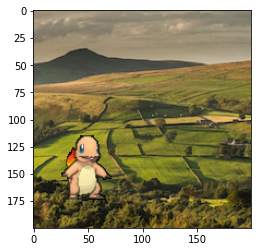

In [335]:
n = yy.shape[0]
idx = np.random.randint(n)
plt.imshow(xx[idx]);
print(yy[idx])
print("percent no obj:", (yy[:,7] == 0).sum() / n)
print("percent charmander:", yy[:,4].sum() / n)
print("percent bulbasaur:", yy[:,5].sum() / n)
print("percent squirtle:", yy[:,6].sum() / n)

In [0]:
def make_vgg(box_size=200):
  IMG_SHAPE=[box_size,box_size,3]
  vgg16=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
  
  x=Flatten()(vgg16.output)
  p1=Dense(4,activation='sigmoid')(x)
  p2=Dense(3,activation='softmax')(x)
  p3=Dense(1,activation='sigmoid')(x)

  p1=Concatenate()([p1,p2,p3])
  model=Model(vgg16.input,p1)

  model.compile(loss=poke_loss, optimizer=Adam(lr=0.0001))
  return model

In [339]:
mod = make_vgg(200)
mod.fit_generator(chim_generator6(64),steps_per_epoch=50,epochs=5)



Epoch 1/5
50/50 [==============================] - 37s 742ms/step - loss: 1.0438
Epoch 2/5
50/50 [==============================] - 37s 749ms/step - loss: 0.8741
Epoch 3/5
50/50 [==============================] - 37s 745ms/step - loss: 0.7599
Epoch 4/5
50/50 [==============================] - 37s 744ms/step - loss: 0.7141
Epoch 5/5
50/50 [==============================] - 37s 743ms/step - loss: 0.6351


In [0]:
from matplotlib.patches import Rectangle
chim = imread('charmander-tight.png')
buim=imread('bulbasaur-tight.png')
sim=imread('squirtle-tight.png')
# Make predictions
def make_prediction6():
  bnum=np.random.randint(1,16)
  bim = imread('/content/backgrounds/'+str(bnum)+'.jpg')
  bim=np.array(bim)
  b_h=bim.shape[0]
  b_w=bim.shape[1]
  b_row0=np.random.randint(b_h-200)
  b_col0=np.random.randint(b_w-200)
  b_row1=b_row0+200
  b_col1=b_col0+200
  bg=bim[b_row0:b_row1,b_col0:b_col1,:].copy()
  if np.random.random()>0.75:    
    imdec=np.random.randint(0,31)
    if imdec%3==0:
      im=np.array(chim)
    if imdec%3==1:
      im=np.array(buim)
    elif imdec%3==2:
      im=np.array(sim)
    im_h=chim.shape[0]
    im_w=chim.shape[1]  
    scale = 0.5 + np.random.random()
    newh=int(im_h*scale)
    neww=int(im_w*scale)
    obj = resize(im,(newh, neww),preserve_range=True).astype(np.uint8) 
    row0=np.random.randint(box_size-newh)
    col0=np.random.randint(box_size-neww)
    row1=row0+newh
    col1=col0+neww

    if np.random.random() < 0.5:
      obj = np.fliplr(obj)
          
    mask = (obj[:,:,3]==0)
    mask=np.expand_dims(mask,-1)

    bg[row0:row1,col0:col1,:]=bg[row0:row1,col0:col1,:]*mask

    bg[row0:row1,col0:col1,:]+=obj[:,:,:3]


  X = np.expand_dims(bg, 0)/255.

  #plt.imshow(bg.astype(np.uint8))
  p=mod.predict(X)[0]
  
  # Draw the box
  if p[-1]<0.5:
    print("no obj")
    fig,ax = plt.subplots(1)
    ax.imshow(bg.astype(np.uint8))
  else:

    if p[4]>p[5] and p[4]>p[6]:
      print("char,char char")
    elif p[5]>p[4] and p[5]>p[6]:
      print("bulba bulba bulbasaur")
    elif p[6]>p[4] and p[6]>p[5]:
      print("squirtle squirtle") 
    row0 = int(p[0]*200)
    col0 = int(p[1]*200)
    row1 = int(row0 + p[2]*200)
    col1 = int(col0 + p[3]*200)
    print("pred:", row0, col0, row1, col1)
    fig,ax = plt.subplots(1)
    ax.imshow(bg.astype(np.uint8))
    print("box size",p[3]*box_size,p[2]*box_size)
    rect = Rectangle(
        (p[1]*box_size, p[0]*box_size),
        p[3]*box_size, p[2]*box_size,linewidth=1,edgecolor='red',facecolor='none')
    ax.add_patch(rect)
  plt.show()

char,char char
pred: 117 17 177 69
box size 52.503496408462524 60.133230686187744


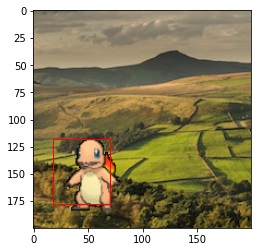

In [353]:
make_prediction6()